In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix,log_loss
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pickle
import yaml

In [2]:
df = pd.read_csv("../1.Data/2.Processed/processed2.csv",index_col=0)
df

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,...,Eficacia pagos respecto financiación inicial,Proporción Morosidad según financiación,Proporción Morosidad según Batch Enrolled,Grado_interes,Grado_interes_ordered,Grade_ordered,SubGrade_ordered,verification_status_ordered,initial_list_status_ordered,application_type_ordered
ID,,,,,,,,,,,,,,,,,,,,,
65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,20.117115,...,0.090884,0.081828,0.095068,Interes medio,0.092253,0.087237,0.093538,0.088663,0.088901,0.092516
1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,4.544139,...,0.064724,0.090536,0.105029,Interes medio,0.092253,0.093896,0.089912,0.095694,0.096714,0.092516
1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,10.438819,...,0.094738,0.081828,0.092179,Interes medio,0.092253,0.103740,0.090244,0.088663,0.088901,0.092516
6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,12.353020,...,0.041446,0.090536,0.092275,Interes alto,0.093069,0.093896,0.094201,0.088663,0.088901,0.092516
14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,5.046181,...,0.011231,0.093986,0.087944,Interes alto,0.093069,0.093896,0.090244,0.088663,0.088901,0.092516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,9.578046,...,0.288985,0.093986,0.087446,Interes bajo,0.092216,0.093896,0.091431,0.088663,0.088901,0.092516
35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,7.471039,...,0.280720,0.093986,0.099459,Interes bajo,0.092216,0.093896,0.082521,0.095694,0.088901,0.092516
16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,3.971477,...,0.081772,0.153846,0.104027,Interes alto,0.093069,0.091248,0.098616,0.088663,0.088901,0.092516


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67463 entries, 65087372 to 65443173
Data columns (total 48 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Loan Amount                                       67463 non-null  int64  
 1   Funded Amount                                     67463 non-null  int64  
 2   Funded Amount Investor                            67463 non-null  float64
 3   Term                                              67463 non-null  int64  
 4   Batch Enrolled                                    67463 non-null  object 
 5   Interest Rate                                     67463 non-null  float64
 6   Grade                                             67463 non-null  object 
 7   Sub Grade                                         67463 non-null  object 
 8   Home Ownership                                    67463 non-null  object 
 9   Employm

In [4]:
df.loc[:,:"Open Account"].describe()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Debit to Income,Delinquency - two years,Inquires - six months,Open Account
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000
mean,16848.902776,15770.599114,14621.799323,58.173814,11.846258,9.187942,23.299241,0.327127,0.145754,14.266561
std,8367.865726,8150.992662,6785.345170,3.327441,3.718629,5.136792,8.451824,0.800888,0.473291,6.225060
min,1014.000000,1014.000000,1114.590204,36.000000,5.320006,1.662507,0.675299,0.000000,0.000000,2.000000
25%,10012.000000,9266.500000,9831.684984,58.000000,9.297147,5.896628,16.756416,0.000000,0.000000,10.000000
50%,16073.000000,13042.000000,12793.682170,59.000000,11.377696,7.909632,22.656658,0.000000,0.000000,13.000000
75%,22106.000000,21793.000000,17807.594120,59.000000,14.193533,10.794356,30.048400,0.000000,0.000000,16.000000
max,35000.000000,34999.000000,34999.746430,59.000000,27.182348,46.379368,39.629862,8.000000,5.000000,37.000000


In [5]:
df.loc[:,"Public Record":"Last week Pay"].describe()

,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000
mean,0.081437,7699.342425,52.889443,18.627929,2068.992542,1.143969,59.691578,1.125141,0.021301,71.163260
std,0.346606,7836.148190,22.539450,8.319246,2221.918745,5.244365,357.026346,3.489885,0.144385,43.315845
min,0.000000,0.000000,0.005172,4.000000,4.736746,0.000003,0.000036,0.000036,0.000000,0.000000
25%,0.000000,2557.000000,38.658825,13.000000,570.903814,0.021114,1.629818,0.476259,0.000000,35.000000
50%,0.000000,5516.000000,54.082334,18.000000,1330.842771,0.043398,3.344524,0.780141,0.000000,68.000000
75%,0.000000,10184.500000,69.177117,23.000000,2656.956837,0.071884,5.453727,1.070566,0.000000,105.000000
max,4.000000,116933.000000,100.880050,72.000000,14301.368310,42.618882,4354.467419,166.833000,1.000000,161.000000


In [6]:
df.loc[:,"Last week Pay":"Eficacia pagos respecto financiación inicial"].describe()

,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Funded Amount/Interest Rate,Funded Amount / Debit to Income,Inquires - six months / Open Account,Revolving Balance / Total Revolving Credit Limit,Delinquency - two years / Total Accounts,cuentas públicas prestatario,Eficacia pagos respecto financiación inicial
count,67463.000000,67463.000000,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000
mean,71.163260,146.467990,1.595739e+05,23123.005544,0.092510,1474.849009,807.193076,0.011914,0.795545,0.022713,0.102738,0.173749
std,43.315845,744.382233,1.390332e+05,20916.699999,0.289747,947.189719,663.834935,0.041687,1.582962,0.067641,0.376658,0.239998
min,0.000000,1.000000,6.170000e+02,1000.000000,0.000000,65.494750,29.076308,0.000000,0.000000,0.000000,0.000000,0.000164
25%,35.000000,24.000000,5.037900e+04,8155.500000,0.000000,774.270563,388.529612,0.000000,0.121485,0.000000,0.000000,0.038919
50%,68.000000,36.000000,1.183690e+05,16733.000000,0.000000,1213.625096,631.189539,0.000000,0.317982,0.000000,0.000000,0.094562
75%,105.000000,46.000000,2.283750e+05,32146.500000,0.000000,1938.685276,1014.249464,0.000000,0.809357,0.000000,0.000000,0.212829
max,161.000000,16421.000000,1.177412e+06,201169.000000,1.000000,6491.829342,27329.355315,1.000000,58.966197,2.000000,5.000000,8.898065


In [7]:
df.loc[:,"Proporción Morosidad según financiación":].describe()

,Proporción Morosidad según financiación,Proporción Morosidad según Batch Enrolled,Grado_interes_ordered,Grade_ordered,SubGrade_ordered,verification_status_ordered,initial_list_status_ordered,application_type_ordered
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000
mean,0.092510,0.092510,0.092510,0.092510,0.092510,0.092510,0.092510,0.092510
std,0.012567,0.007085,0.000393,0.004178,0.006430,0.004476,0.003896,0.000132
min,0.000000,0.078297,0.092216,0.087237,0.078558,0.088663,0.088901,0.089431
25%,0.090536,0.087446,0.092216,0.087237,0.089912,0.088663,0.088901,0.092516
50%,0.093986,0.093750,0.092253,0.093896,0.093538,0.088663,0.088901,0.092516
75%,0.093986,0.096085,0.093069,0.095873,0.095657,0.095694,0.096714,0.092516
max,0.500000,0.125000,0.093069,0.106349,0.130081,0.101551,0.096714,0.092516


In [8]:
df.drop(["Batch Enrolled","Grade","Sub Grade","Home Ownership","Verification Status","Loan Title","Initial List Status","Application Type","Grado_interes"],axis=1,inplace=True)
df

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,...,cuentas públicas prestatario,Eficacia pagos respecto financiación inicial,Proporción Morosidad según financiación,Proporción Morosidad según Batch Enrolled,Grado_interes_ordered,Grade_ordered,SubGrade_ordered,verification_status_ordered,initial_list_status_ordered,application_type_ordered
ID,,,,,,,,,,,,,,,,,,,,,
65087372,10000,32236,12329.36286,59,11.135007,20.117115,16.284758,1,0,13,...,0,0.090884,0.081828,0.095068,0.092253,0.087237,0.093538,0.088663,0.088901,0.092516
1450153,3609,11940,12191.99692,59,12.237563,4.544139,15.412409,0,0,12,...,0,0.064724,0.090536,0.105029,0.092253,0.093896,0.089912,0.095694,0.096714,0.092516
1969101,28276,9311,21603.22455,59,12.545884,10.438819,28.137619,0,0,14,...,0,0.094738,0.081828,0.092179,0.092253,0.103740,0.090244,0.088663,0.088901,0.092516
6651430,11170,6954,17877.15585,59,16.731201,12.353020,18.043730,1,0,7,...,0,0.041446,0.090536,0.092275,0.093069,0.093896,0.094201,0.088663,0.088901,0.092516
14354669,16890,13226,13539.92667,59,15.008300,5.046181,17.209886,1,3,13,...,1,0.011231,0.093986,0.087944,0.093069,0.093896,0.090244,0.088663,0.088901,0.092516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16164945,13601,6848,13175.28583,59,9.408858,9.578046,28.105127,1,0,13,...,0,0.288985,0.093986,0.087446,0.092216,0.093896,0.091431,0.088663,0.088901,0.092516
35182714,8323,11046,15637.46301,59,9.972104,7.471039,17.694279,0,0,12,...,0,0.280720,0.093986,0.099459,0.092216,0.093896,0.082521,0.095694,0.088901,0.092516
16435904,15897,32921,12329.45775,59,19.650943,3.971477,10.295774,0,0,7,...,1,0.081772,0.153846,0.104027,0.093069,0.091248,0.098616,0.088663,0.088901,0.092516


In [9]:
df.describe()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,...,cuentas públicas prestatario,Eficacia pagos respecto financiación inicial,Proporción Morosidad según financiación,Proporción Morosidad según Batch Enrolled,Grado_interes_ordered,Grade_ordered,SubGrade_ordered,verification_status_ordered,initial_list_status_ordered,application_type_ordered
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000
mean,16848.902776,15770.599114,14621.799323,58.173814,11.846258,9.187942,23.299241,0.327127,0.145754,14.266561,...,0.102738,0.173749,0.092510,0.092510,0.092510,0.092510,0.092510,0.092510,0.092510,0.092510
std,8367.865726,8150.992662,6785.345170,3.327441,3.718629,5.136792,8.451824,0.800888,0.473291,6.225060,...,0.376658,0.239998,0.012567,0.007085,0.000393,0.004178,0.006430,0.004476,0.003896,0.000132
min,1014.000000,1014.000000,1114.590204,36.000000,5.320006,1.662507,0.675299,0.000000,0.000000,2.000000,...,0.000000,0.000164,0.000000,0.078297,0.092216,0.087237,0.078558,0.088663,0.088901,0.089431
25%,10012.000000,9266.500000,9831.684984,58.000000,9.297147,5.896628,16.756416,0.000000,0.000000,10.000000,...,0.000000,0.038919,0.090536,0.087446,0.092216,0.087237,0.089912,0.088663,0.088901,0.092516
50%,16073.000000,13042.000000,12793.682170,59.000000,11.377696,7.909632,22.656658,0.000000,0.000000,13.000000,...,0.000000,0.094562,0.093986,0.093750,0.092253,0.093896,0.093538,0.088663,0.088901,0.092516
75%,22106.000000,21793.000000,17807.594120,59.000000,14.193533,10.794356,30.048400,0.000000,0.000000,16.000000,...,0.000000,0.212829,0.093986,0.096085,0.093069,0.095873,0.095657,0.095694,0.096714,0.092516
max,35000.000000,34999.000000,34999.746430,59.000000,27.182348,46.379368,39.629862,8.000000,5.000000,37.000000,...,5.000000,8.898065,0.500000,0.125000,0.093069,0.106349,0.130081,0.101551,0.096714,0.092516


In [10]:
df.iloc[:,20:30].describe()

,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Funded Amount/Interest Rate,Funded Amount / Debit to Income,Inquires - six months / Open Account,Revolving Balance / Total Revolving Credit Limit,Delinquency - two years / Total Accounts,cuentas públicas prestatario
count,67463.000000,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000
mean,146.467990,1.595739e+05,23123.005544,0.092510,1474.849009,807.193076,0.011914,0.795545,0.022713,0.102738
std,744.382233,1.390332e+05,20916.699999,0.289747,947.189719,663.834935,0.041687,1.582962,0.067641,0.376658
min,1.000000,6.170000e+02,1000.000000,0.000000,65.494750,29.076308,0.000000,0.000000,0.000000,0.000000
25%,24.000000,5.037900e+04,8155.500000,0.000000,774.270563,388.529612,0.000000,0.121485,0.000000,0.000000
50%,36.000000,1.183690e+05,16733.000000,0.000000,1213.625096,631.189539,0.000000,0.317982,0.000000,0.000000
75%,46.000000,2.283750e+05,32146.500000,0.000000,1938.685276,1014.249464,0.000000,0.809357,0.000000,0.000000
max,16421.000000,1.177412e+06,201169.000000,1.000000,6491.829342,27329.355315,1.000000,58.966197,2.000000,5.000000


In [11]:
df.columns

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Employment Duration', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Total Received Interest', 'Total Received Late Fee',
       'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical',
       'Last week Pay', 'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status',
       'Funded Amount/Interest Rate', 'Funded Amount / Debit to Income',
       'Inquires - six months / Open Account',
       'Revolving Balance / Total Revolving Credit Limit',
       'Delinquency - two years / Total Accounts',
       'cuentas públicas prestatario',
       'Eficacia pagos respecto financiación inicial',
       'Proporción Morosidad según financiación',
       'Proporción Morosidad según Batch Enrolled', 'Gr

In [12]:
X = df.drop(["Delinquency - two years","Open Account","Inquires - six months","Public Record","Collection 12 months Medical","Total Accounts",
             "verification_status_ordered","initial_list_status_ordered","Loan Status",
       'Delinquency - two years / Total Accounts'
       ],axis=1)
y = df["Loan Status"]

In [13]:
X = np.log1p(X)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67463 entries, 65087372 to 65443173
Data columns (total 29 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Loan Amount                                       67463 non-null  float64
 1   Funded Amount                                     67463 non-null  float64
 2   Funded Amount Investor                            67463 non-null  float64
 3   Term                                              67463 non-null  float64
 4   Interest Rate                                     67463 non-null  float64
 5   Employment Duration                               67463 non-null  float64
 6   Debit to Income                                   67463 non-null  float64
 7   Revolving Balance                                 67463 non-null  float64
 8   Revolving Utilities                               67463 non-null  float64
 9   Total R

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(53970, 29)
(53970,)
(13493, 29)
(13493,)


In [16]:
under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(X_train,y_train)

In [17]:
df_undersampled = pd.concat([X_under,y_under],axis=1)

In [18]:
df_undersampled

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Debit to Income,Revolving Balance,Revolving Utilities,Total Received Interest,...,Revolving Balance / Total Revolving Credit Limit,cuentas públicas prestatario,Eficacia pagos respecto financiación inicial,Proporción Morosidad según financiación,Proporción Morosidad según Batch Enrolled,Grado_interes_ordered,Grade_ordered,SubGrade_ordered,application_type_ordered,Loan Status
0,8.200014,10.315432,9.237687,4.077537,2.694271,1.877144,2.885287,9.338734,4.158679,7.167142,...,2.069348,0.000000,0.042463,0.089828,0.099871,0.088990,0.089745,0.085187,0.088483,0
1,9.502711,10.171413,9.351293,3.610918,3.066884,2.809379,3.174693,10.362999,3.858220,8.963530,...,0.714008,0.000000,0.261444,0.086669,0.091459,0.088990,0.092014,0.090024,0.088483,0
2,9.755683,9.716495,9.392973,4.077537,2.410296,2.293750,2.500641,8.913954,4.383901,6.850187,...,0.928695,0.693147,0.055295,0.089828,0.095128,0.088242,0.083640,0.087907,0.088483,0
3,8.888895,9.339349,8.424216,4.094345,2.809668,2.218922,3.163923,9.117896,3.545839,9.530739,...,0.207500,0.000000,0.793422,0.086196,0.088175,0.088990,0.089745,0.089419,0.088483,0
4,10.057024,9.089753,9.455130,4.077537,2.566543,1.903246,3.686230,7.701200,4.024024,7.895885,...,0.089356,0.000000,0.264647,0.089828,0.076750,0.088242,0.083640,0.089419,0.088483,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9.541297,9.980217,9.985817,4.077537,2.318726,1.963164,3.231711,8.996157,4.296488,7.223586,...,0.442764,0.000000,0.061532,0.086669,0.095128,0.088208,0.089745,0.091354,0.088483,1
9982,9.816731,9.445175,9.414679,4.094345,2.816393,2.737926,3.100838,9.165552,4.288472,5.679823,...,1.231403,0.000000,0.022821,0.089828,0.084290,0.088990,0.091552,0.087907,0.088483,1
9983,10.422638,9.718302,8.968144,4.077537,2.815458,1.950704,1.858212,9.215129,3.897892,6.486015,...,0.308153,0.000000,0.038655,0.086196,0.091459,0.088990,0.083640,0.086401,0.088483,1
9984,8.705000,10.049404,9.686469,4.094345,2.197902,1.521392,3.482520,8.753529,4.476887,6.353824,...,0.327412,0.000000,0.024492,0.089828,0.087889,0.088208,0.091552,0.093477,0.088483,1


<Axes: >

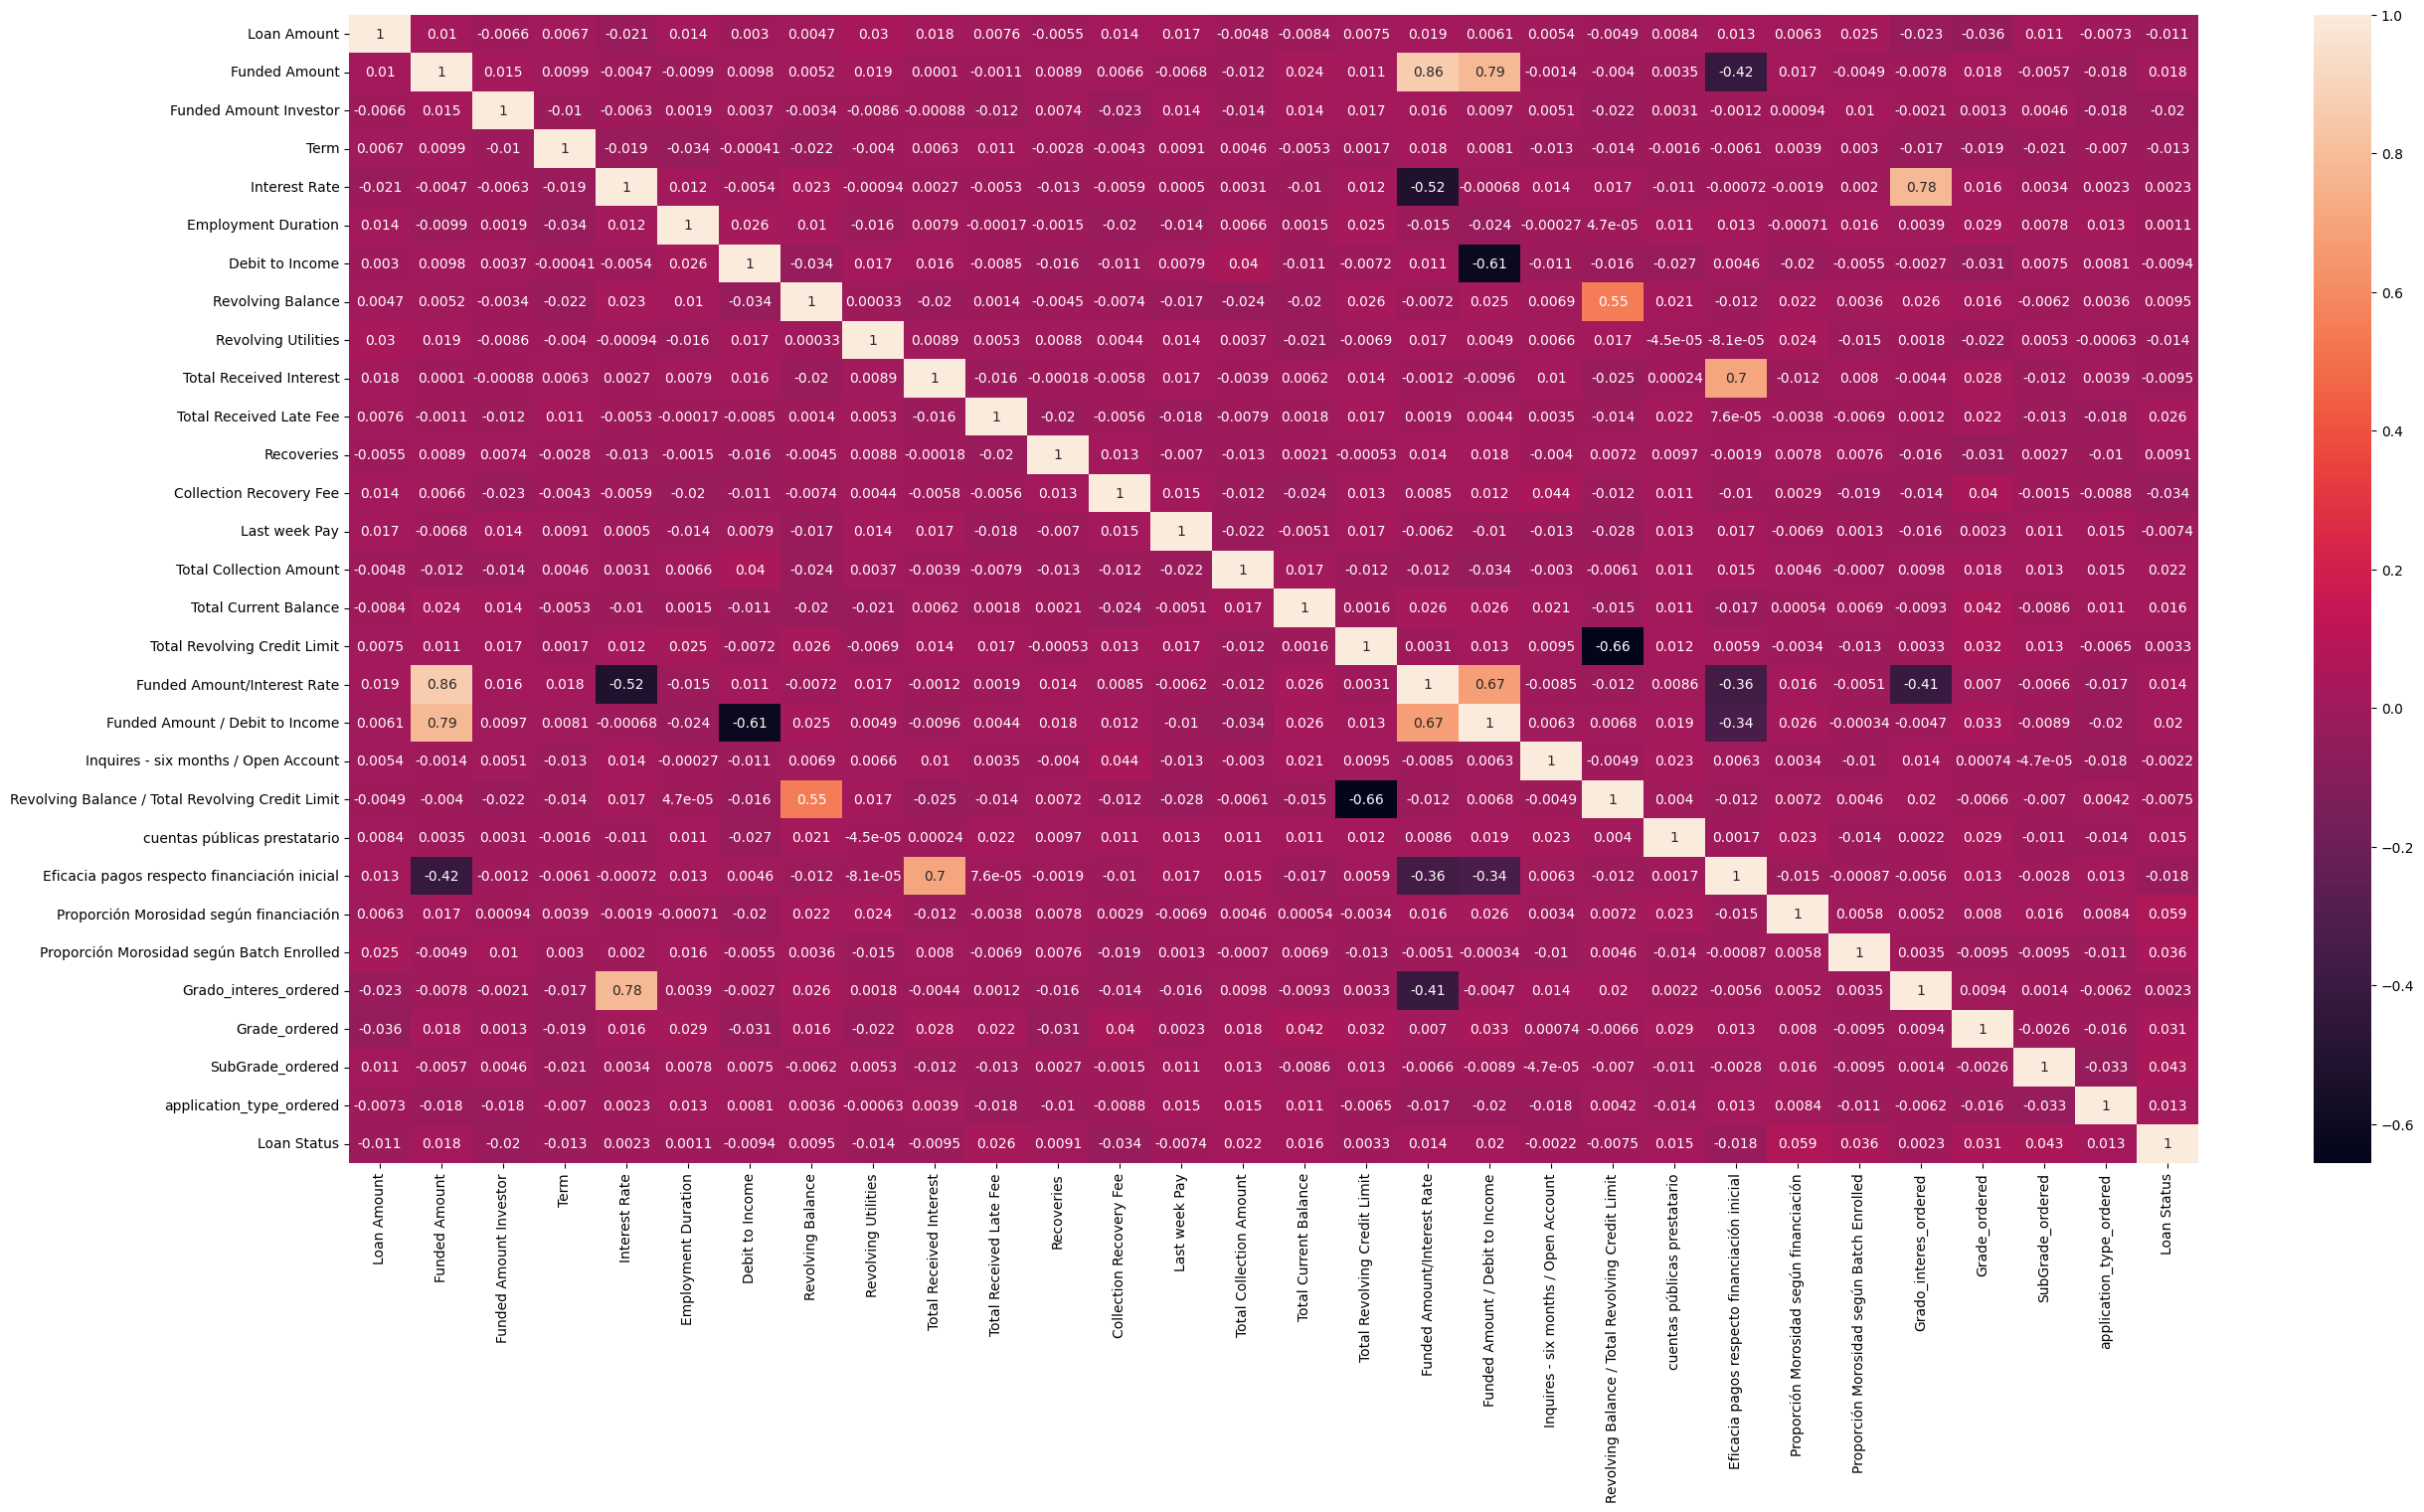

In [19]:
plt.figure(figsize=(30,15))
sns.heatmap(df_undersampled.corr(numeric_only=True),annot=True)

In [20]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under,y_under,test_size=0.2,random_state=42)
print(X_train_under.shape)
print(y_train_under.shape)
print(X_test_under.shape)
print(y_test_under.shape)

(7988, 29)
(7988,)
(1998, 29)
(1998,)


Gradient Boosting

In [21]:
pipegb = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", GradientBoostingClassifier())
])

gb_params = {
"classifier__n_estimators": [100,150],
'scaler' : [StandardScaler(), None],
'selectkbest__k' : np.arange(5,16),
'classifier__max_features': [4,5,6,7],
'classifier__max_depth': [5,6,7],
'classifier__min_samples_split': [2,3,4,5]} 

In [22]:
modelgb = GridSearchCV(estimator = pipegb, param_grid = gb_params, cv=5, scoring="recall",n_jobs=-1)

In [23]:
modelgb.fit(X_train_under, y_train_under)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [5, 6, 7],
                         'classifier__max_features': [4, 5, 6, 7],
                         'classifier__min_samples_split': [2, 3, 4, 5],
                         'classifier__n_estimators': [100, 150],
                         'scaler': [StandardScaler(), None],
                         'selectkbest__k': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
             scoring='recall')

In [24]:
print("modelgb best score:",modelgb.best_score_ )
print("modelgb best score:",modelgb.best_params_ )
print("modelgb best score:",modelgb.best_estimator_ )

modelgb best score: 0.5261139200998751
modelgb best score: {'classifier__max_depth': 7, 'classifier__max_features': 7, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 100, 'scaler': None, 'selectkbest__k': 13}
modelgb best score: Pipeline(steps=[('scaler', None), ('selectkbest', SelectKBest(k=13)),
                ('classifier',
                 GradientBoostingClassifier(max_depth=7, max_features=7,
                                            min_samples_split=4))])


In [25]:

y_pred_under_gb = modelgb.best_estimator_.predict(X_test_under)

In [26]:
print("modelgb train recall score", recall_score(y_test_under, y_pred_under_gb))
print("modelgb train precision_score", precision_score(y_test_under, y_pred_under_gb))
print("modelgb train accuracy_score", accuracy_score(y_test_under, y_pred_under_gb))
print("modelgb train f1_score", f1_score(y_test_under, y_pred_under_gb))
print("modelgb train log_loss", log_loss(y_test_under, y_pred_under_gb))


modelgb train recall score 0.5020161290322581
modelgb train precision_score 0.5025227043390514
modelgb train accuracy_score 0.506006006006006
modelgb train f1_score 0.5022692889561271
modelgb train log_loss 17.805348295825137


In [27]:
print("modelgb train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_gb)

modelgb train confusion matrix


array([[513, 493],
       [494, 498]], dtype=int64)

In [28]:
print("modelgb train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_gb,normalize="true")

modelgb train confusion matrix


array([[0.50994036, 0.49005964],
       [0.49798387, 0.50201613]])

In [29]:
y_pred_gb = modelgb.best_estimator_.predict(X_test)

In [30]:
print("modelgb test recall score", recall_score(y_test, y_pred_gb))
print("modelgb test precision_score", precision_score(y_test, y_pred_gb))
print("modelgb test accuracy_score", accuracy_score(y_test, y_pred_gb))
print("modelgb test f1_score", f1_score(y_test, y_pred_gb))
print("modelgb test log_loss", log_loss(y_test, y_pred_gb))


modelgb test recall score 0.5072115384615384
modelgb test precision_score 0.09733968937413501
modelgb test accuracy_score 0.5193804194767657
modelgb test f1_score 0.1633337633853696
modelgb test log_loss 17.323285572402334


In [31]:
print("modelgb test confusion matrix")
confusion_matrix(y_test, y_pred_gb)

modelgb test confusion matrix


array([[6375, 5870],
       [ 615,  633]], dtype=int64)

In [32]:
print("modelgb test confusion matrix")
confusion_matrix(y_test, y_pred_gb,normalize="true")

modelgb test confusion matrix


array([[0.52062066, 0.47937934],
       [0.49278846, 0.50721154]])

In [33]:
with open("ModeloGB.pkl", 'wb') as archivo_salida:
    pickle.dump(modelgb.best_estimator_, archivo_salida)

In [34]:
with open("ModeloGB.yaml", "w") as f:
    yaml.dump(modelgb.best_params_, f)

Random Forest

In [35]:
piperf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", RandomForestClassifier())
])
rf_params = {
'scaler' : [StandardScaler(), None],
'selectkbest__k' : np.arange(5,15),
'classifier__max_features': [3,5,6,7],
'classifier__max_depth': [2,3,4,5,6],
'classifier__min_samples_split': [2,3,4,5,6]
}

In [36]:
modelrf = GridSearchCV(estimator = piperf, param_grid = rf_params, cv=5, scoring="recall",n_jobs=-1)

In [37]:
modelrf.fit(X_train_under, y_train_under)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6],
                         'classifier__max_features': [3, 5, 6, 7],
                         'classifier__min_samples_split': [2, 3, 4, 5, 6],
                         'scaler': [StandardScaler(), None],
                         'selectkbest__k': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='recall')

In [38]:
print("modelrf best score:",modelrf.best_score_ )
print("modelrf best score:",modelrf.best_params_ )
print("modelrf best score:",modelrf.best_estimator_ )

modelrf best score: 0.6260955056179776
modelrf best score: {'classifier__max_depth': 2, 'classifier__max_features': 7, 'classifier__min_samples_split': 2, 'scaler': StandardScaler(), 'selectkbest__k': 10}
modelrf best score: Pipeline(steps=[('scaler', StandardScaler()), ('selectkbest', SelectKBest()),
                ('classifier',
                 RandomForestClassifier(max_depth=2, max_features=7))])


In [39]:
y_pred_under_rf = modelrf.best_estimator_.predict(X_test_under)

In [40]:
print("modelrf train recall score", recall_score(y_test_under, y_pred_under_rf))
print("modelrf train precision_score", precision_score(y_test_under, y_pred_under_rf))
print("modelrf train accuracy_score", accuracy_score(y_test_under, y_pred_under_rf))
print("modelrf train f1_score", f1_score(y_test_under, y_pred_under_rf))
print("modelrf train log_loss", log_loss(y_test_under, y_pred_under_rf))


modelrf train recall score 0.5221774193548387
modelrf train precision_score 0.518
modelrf train accuracy_score 0.5215215215215215
modelrf train f1_score 0.5200803212851406
modelrf train log_loss 17.246112432430422


In [41]:
print("modelrf train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_rf)


modelrf train confusion matrix


array([[524, 482],
       [474, 518]], dtype=int64)

In [42]:
print("modelrf train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_rf,normalize="true")

modelrf train confusion matrix


array([[0.52087475, 0.47912525],
       [0.47782258, 0.52217742]])

In [43]:
y_pred_rf = modelrf.best_estimator_.predict(X_test)

In [44]:
print("modelrf test recall score", recall_score(y_test, y_pred_rf))
print("modelrf test precision_score", precision_score(y_test, y_pred_rf))
print("modelrf test accuracy_score", accuracy_score(y_test, y_pred_rf))
print("modelrf test f1_score", f1_score(y_test, y_pred_rf))
print("modelrf test log_loss", log_loss(y_test, y_pred_rf))


modelrf test recall score 0.5360576923076923
modelrf test precision_score 0.10078336848448328
modelrf test accuracy_score 0.5147113318016749
modelrf test f1_score 0.16966776566066447
modelrf test log_loss 17.491576550206705


In [45]:
print("modelrf test confusion matrix")
confusion_matrix(y_test, y_pred_rf)


modelrf test confusion matrix


array([[6276, 5969],
       [ 579,  669]], dtype=int64)

In [46]:
print("modelrf test confusion matrix")
confusion_matrix(y_test, y_pred_rf,normalize="true")

modelrf test confusion matrix


array([[0.51253573, 0.48746427],
       [0.46394231, 0.53605769]])

In [47]:
with open("ModeloRF.pkl", 'wb') as archivo_salida:
    pickle.dump(modelrf.best_estimator_, archivo_salida)
with open("ModeloRF.yaml", "w") as f:
    yaml.dump(modelrf.best_params_, f)

BaggingClassifier

In [48]:
pipebc = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", BaggingClassifier())
])
bc_params = {
'scaler' : [StandardScaler(), None],
'selectkbest__k' : np.arange(5,15),
'classifier__max_features': [3,4,5,6,7],
'classifier__n_estimators': [100,125,150],
'classifier__max_samples': [0.1,0.5,0.7]}

In [49]:
modelBC = GridSearchCV(estimator = pipebc, param_grid = bc_params, cv=5, scoring="recall",n_jobs=-1)

In [50]:
modelBC.fit(X_train_under, y_train_under)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 4500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\si

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier', BaggingClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_features': [3, 4, 5, 6, 7],
                         'classifier__max_samples': [0.1, 0.5, 0.7],
                         'classifier__n_estimators': [100, 125, 150],
                         'scaler': [StandardScaler(), None],
                         'selectkbest__k': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='recall')

In [51]:
print("modelBC best score:",modelBC.best_score_ )
print("modelBC best score:",modelBC.best_params_ )
print("modelBC best score:",modelBC.best_estimator_ )

modelBC best score: 0.5363686017478153
modelBC best score: {'classifier__max_features': 5, 'classifier__max_samples': 0.1, 'classifier__n_estimators': 125, 'scaler': None, 'selectkbest__k': 14}
modelBC best score: Pipeline(steps=[('scaler', None), ('selectkbest', SelectKBest(k=14)),
                ('classifier',
                 BaggingClassifier(max_features=5, max_samples=0.1,
                                   n_estimators=125))])


In [52]:
y_pred_under_bc = modelBC.best_estimator_.predict(X_test_under)

In [53]:
print("modelBC train recall score", recall_score(y_test_under, y_pred_under_bc))
print("modelBC train precision_score", precision_score(y_test_under, y_pred_under_bc))
print("modelBC train accuracy_score", accuracy_score(y_test_under, y_pred_under_bc))
print("modelBC train f1_score", f1_score(y_test_under, y_pred_under_bc))
print("modelBC train log_loss", log_loss(y_test_under, y_pred_under_bc))

modelBC train recall score 0.5211693548387096
modelBC train precision_score 0.5243407707910751
modelBC train accuracy_score 0.5275275275275275
modelBC train f1_score 0.5227502527805864
modelBC train log_loss 17.02963403369699


In [54]:
print("modelBC train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_bc)


modelBC train confusion matrix


array([[537, 469],
       [475, 517]], dtype=int64)

In [55]:
print("modelBC train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_bc,normalize="true")

modelBC train confusion matrix


array([[0.53379722, 0.46620278],
       [0.47883065, 0.52116935]])

In [56]:
y_pred_bc = modelBC.best_estimator_.predict(X_test)

In [57]:
print("modelBC test recall score", recall_score(y_test, y_pred_bc))
print("modelBC test precision_score", precision_score(y_test, y_pred_bc))
print("modelBC test accuracy_score", accuracy_score(y_test, y_pred_bc))
print("modelBC test f1_score", f1_score(y_test, y_pred_bc))
print("modelBC test log_loss", log_loss(y_test, y_pred_bc))


modelBC test recall score 0.5168269230769231
modelBC test precision_score 0.09572573463935886
modelBC test accuracy_score 0.5037426813903505
modelBC test f1_score 0.16153268219383923
modelBC test log_loss 17.88692678377888


In [58]:
print("modelBC test confusion matrix")
confusion_matrix(y_test, y_pred_bc)


modelBC test confusion matrix


array([[6152, 6093],
       [ 603,  645]], dtype=int64)

In [59]:
print("modelBC test confusion matrix")
confusion_matrix(y_test, y_pred_bc,normalize="true")

modelBC test confusion matrix


array([[0.50240915, 0.49759085],
       [0.48317308, 0.51682692]])

In [60]:
with open("modelBC.pkl", 'wb') as archivo_salida:
    pickle.dump(modelBC.best_estimator_, archivo_salida)
with open("modelBC.yaml", "w") as f:
    yaml.dump(modelBC.best_params_, f)

AdaBoost

In [61]:
pipeab = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", AdaBoostClassifier())
])
ab_params = {
'scaler' : [StandardScaler(), None],
'selectkbest__k' : np.arange(5,15),
'classifier__learning_rate': [0.1,0.3,0.5,1],
'classifier__n_estimators': [100,125]}

In [62]:
modelAB = GridSearchCV(estimator = pipeab, param_grid = ab_params, cv=3, scoring="recall",n_jobs=-1)

In [63]:
modelAB.fit(X_train_under, y_train_under)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.1, 0.3, 0.5, 1],
                         'classifier__n_estimators': [100, 125],
                         'scaler': [StandardScaler(), None],
                         'selectkbest__k': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='recall')

In [64]:
print("modelAB best score:",modelAB.best_score_ )
print("modelAB best score:",modelAB.best_params_ )
print("modelAB best score:",modelAB.best_estimator_ )

modelAB best score: 0.5453758492096787
modelAB best score: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 125, 'scaler': StandardScaler(), 'selectkbest__k': 7}
modelAB best score: Pipeline(steps=[('scaler', StandardScaler()), ('selectkbest', SelectKBest(k=7)),
                ('classifier',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=125))])


In [65]:
y_pred_under_ab = modelAB.best_estimator_.predict(X_test_under)

In [66]:
print("modelAB train recall score", recall_score(y_test_under, y_pred_under_ab))
print("modelAB train precision_score", precision_score(y_test_under, y_pred_under_ab))
print("modelAB train accuracy_score", accuracy_score(y_test_under, y_pred_under_ab))
print("modelAB train f1_score", f1_score(y_test_under, y_pred_under_ab))
print("modelAB train log_loss", log_loss(y_test_under, y_pred_under_ab))

modelAB train recall score 0.5584677419354839
modelAB train precision_score 0.5291308500477555
modelAB train accuracy_score 0.534034034034034
modelAB train f1_score 0.5434036292300147
modelAB train log_loss 16.795115768402432


In [67]:
print("modelAB train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_ab)


modelAB train confusion matrix


array([[513, 493],
       [438, 554]], dtype=int64)

In [68]:
print("modelAB train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_ab,normalize="true")

modelAB train confusion matrix


array([[0.50994036, 0.49005964],
       [0.44153226, 0.55846774]])

In [69]:
y_pred_ab = modelAB.best_estimator_.predict(X_test)

In [70]:
print("modelAB test recall score", recall_score(y_test, y_pred_ab))
print("modelAB test precision_score", precision_score(y_test, y_pred_ab))
print("modelAB test accuracy_score", accuracy_score(y_test, y_pred_ab))
print("modelAB test f1_score", f1_score(y_test, y_pred_ab))
print("modelAB test log_loss", log_loss(y_test, y_pred_ab))


modelAB test recall score 0.5705128205128205
modelAB test precision_score 0.10083557569749327
modelAB test accuracy_score 0.48973541836507817
modelAB test f1_score 0.17138043085810567
modelAB test log_loss 18.391799717191994


In [71]:
print("modelAB test confusion matrix")
confusion_matrix(y_test, y_pred_ab)


modelAB test confusion matrix


array([[5896, 6349],
       [ 536,  712]], dtype=int64)

In [72]:
print("modelAB test confusion matrix")
confusion_matrix(y_test, y_pred_ab,normalize="true")

modelAB test confusion matrix


array([[0.48150265, 0.51849735],
       [0.42948718, 0.57051282]])

In [73]:
with open("modelAB.pkl", 'wb') as archivo_salida:
    pickle.dump(modelAB.best_estimator_, archivo_salida)
with open("modelAB.yaml", "w") as f:
    yaml.dump(modelAB.best_params_, f)

KNeighborsClassifier

In [74]:
pipeknn = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", KNeighborsClassifier())
])
knn_params = {
'scaler' : [StandardScaler(), None],
'selectkbest__k' : np.arange(5,15),
"classifier__n_neighbors": np.arange(3,20),
'classifier__weights': ['uniform', 'distance'],
'classifier__p': [1, 2]}

In [75]:
modelknn = GridSearchCV(estimator = pipeknn, param_grid = knn_params, cv=5, scoring="recall",n_jobs=-1)

In [76]:
modelknn.fit(X_train_under, y_train_under)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'classifier__p': [1, 2],
                         'classifier__weights': ['uniform', 'distance'],
                         'scaler': [StandardScaler(), None],
                         'selectkbest__k': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='recall')

In [77]:
print("modelknn best score:",modelknn.best_score_ )
print("modelknn best score:",modelknn.best_params_ )
print("modelknn best score:",modelknn.best_estimator_ )

modelknn best score: 0.5316201622971286
modelknn best score: {'classifier__n_neighbors': 17, 'classifier__p': 1, 'classifier__weights': 'uniform', 'scaler': StandardScaler(), 'selectkbest__k': 13}
modelknn best score: Pipeline(steps=[('scaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=13)),
                ('classifier', KNeighborsClassifier(n_neighbors=17, p=1))])


In [78]:
y_pred_under_knn = modelknn.best_estimator_.predict(X_test_under)

In [79]:
print("modelknn train recall score", recall_score(y_test_under, y_pred_under_knn))
print("modelknn train precision_score", precision_score(y_test_under, y_pred_under_knn))
print("modelknn train accuracy_score", accuracy_score(y_test_under, y_pred_under_knn))
print("modelknn train f1_score", f1_score(y_test_under, y_pred_under_knn))
print("modelknn train log_loss", log_loss(y_test_under, y_pred_under_knn))

modelknn train recall score 0.5252016129032258
modelknn train precision_score 0.49856459330143543
modelknn train accuracy_score 0.502002002002002
modelknn train f1_score 0.5115365733922436
modelknn train log_loss 17.949667228314095


In [80]:
print("modelknn train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_knn)


modelknn train confusion matrix


array([[482, 524],
       [471, 521]], dtype=int64)

In [81]:
print("modelknn train confusion matrix")
confusion_matrix(y_test_under, y_pred_under_knn,normalize="true")

modelknn train confusion matrix


array([[0.47912525, 0.52087475],
       [0.47479839, 0.52520161]])

In [82]:
y_pred_knn = modelknn.best_estimator_.predict(X_test)

In [83]:
print("modelknn test recall score", recall_score(y_test, y_pred_knn))
print("modelknn test precision_score", precision_score(y_test, y_pred_knn))
print("modelknn test accuracy_score", accuracy_score(y_test, y_pred_knn))
print("modelknn test f1_score", f1_score(y_test, y_pred_knn))
print("modelknn test log_loss", log_loss(y_test, y_pred_knn))


modelknn test recall score 0.5040064102564102
modelknn test precision_score 0.09114621069410231
modelknn test accuracy_score 0.4892907433484029
modelknn test f1_score 0.15437476991041846
modelknn test log_loss 18.407827429363838


In [84]:
print("modelknn test confusion matrix")
confusion_matrix(y_test, y_pred_knn)

modelknn test confusion matrix


array([[5973, 6272],
       [ 619,  629]], dtype=int64)

In [85]:
print("modelknn test confusion matrix")
confusion_matrix(y_test, y_pred_knn,normalize="true")

modelknn test confusion matrix


array([[0.48779094, 0.51220906],
       [0.49599359, 0.50400641]])

In [86]:
with open("modelknn.pkl", 'wb') as archivo_salida:
    pickle.dump(modelknn.best_estimator_, archivo_salida)
with open("modelknn.yaml", "w") as f:
    yaml.dump(modelknn.best_params_, f)

In [87]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [88]:
pipe_pca = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier())
])

params= {
    'scaler': [StandardScaler(), None],
    'pca__n_components': [5,6,7,8],
    'classifier__max_depth': np.arange(3,8),
    'classifier__min_samples_leaf': [2,3,4,5]
}

In [89]:
modelpca = GridSearchCV(pipe_pca, params, cv=5, scoring='recall')

In [90]:
modelpca.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': array([3, 4, 5, 6, 7]),
                         'classifier__min_samples_leaf': [2, 3, 4, 5],
                         'pca__n_components': [5, 6, 7, 8],
                         'scaler': [StandardScaler(), None]},
             scoring='recall')

In [91]:
print("modelpca best score",modelpca.best_score_)
print("modelpca best params",modelpca.best_params_)
print("modelpca best estimator",modelpca.best_estimator_)

modelpca best score 0.0002002002002002002
modelpca best params {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'pca__n_components': 7, 'scaler': StandardScaler()}
modelpca best estimator Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=7)),
                ('classifier',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=2))])


In [92]:
y_pred_train = modelpca.best_estimator_.predict(X_train)

In [93]:
print("modelpca train recall score", recall_score(y_train, y_pred_train))
print("modelpca train precision_score", precision_score(y_train, y_pred_train))
print("modelpca train accuracy_score", accuracy_score(y_train, y_pred_train))
print("modelpca train f1_score", f1_score(y_train, y_pred_train))
print("modelpca train log_loss", log_loss(y_train, y_pred_train))

modelpca train recall score 0.0
modelpca train precision_score 0.0
modelpca train accuracy_score 0.9074856401704651
modelpca train f1_score 0.0
modelpca train log_loss 3.3345555192118206


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
print("modelpca train confusion matrix")
confusion_matrix(y_train, y_pred_train)

modelpca train confusion matrix


array([[48977,     0],
       [ 4993,     0]], dtype=int64)

In [95]:
print("modelpca train confusion matrix")
confusion_matrix(y_train, y_pred_train,normalize="true")

modelpca train confusion matrix


array([[1., 0.],
       [1., 0.]])

In [96]:
y_pred_pca = modelpca.best_estimator_.predict(X_test)

In [97]:
print("modelpca test recall score", recall_score(y_test, y_pred_pca))
print("modelpca test precision_score", precision_score(y_test, y_pred_pca))
print("modelpca test accuracy_score", accuracy_score(y_test, y_pred_pca))
print("modelpca test f1_score", f1_score(y_test, y_pred_pca))
print("modelpca test log_loss", log_loss(y_test, y_pred_pca))

modelpca test recall score 0.0
modelpca test precision_score 0.0
modelpca test accuracy_score 0.9075075965315349
modelpca test f1_score 0.0
modelpca test log_loss 3.3337641317437345


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
print("modelpca test confusion matrix")
confusion_matrix(y_test, y_pred_pca)

modelpca test confusion matrix


array([[12245,     0],
       [ 1248,     0]], dtype=int64)

In [99]:
print("modelpca test confusion matrix")
confusion_matrix(y_test, y_pred_pca,normalize="true")

modelpca test confusion matrix


array([[1., 0.],
       [1., 0.]])

In [100]:
with open("modelpca.pkl", 'wb') as archivo_salida:
    pickle.dump(modelpca.best_estimator_, archivo_salida)
with open("modelpca.yaml", "w") as f:
    yaml.dump(modelpca.best_params_, f)